In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import logging

from pygg.inputs.streetmap import download_street_data, write_shape
from pygg.test_utils.grids import SMALL_ZH_GRID_LV95
from pygg.test_utils import TestPaths

logging.basicConfig()
logging.getLogger("pygg.inputs.streetmap").setLevel(logging.INFO)

In [6]:
# Download the data
# This api does not get the height of the buildings
shape_file = download_street_data(TestPaths.OUTPUT / 'test.shp', SMALL_ZH_GRID_LV95)

INFO:pygg.inputs.streetmap:Querying openstreetmap


In [7]:
# View the shapefile with geopandas
import geopandas as gpd
gdf = gpd.read_file(shape_file)
gdf.explore()

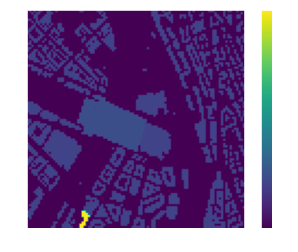

In [17]:
from pygg.inputs.buildings import shapefile_to_grid

# Convert the shapefile to a gral file
heights = shapefile_to_grid(SMALL_ZH_GRID_LV95, shape_file)
plt.imshow(heights)
plt.colorbar()

In [16]:
# Try the other versions 
# One can find zurich data there:  https://www.stadt-zuerich.ch/geodaten/ 
# Note: This file was adapted by ivo suter, bridges where removed
zh_file = "/store/empa/em05/isuter/projects/gg/data/buildings/zurich/GEOZ/25D_buildings_zurich_fixedattributes.shp"
gdf_zh = gpd.read_file(zh_file)


In [20]:
# Show some of the buildings
gdf_zh.iloc[:200].explore('HRELMAX')

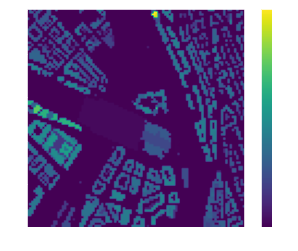

In [21]:
heights = shapefile_to_grid(SMALL_ZH_GRID_LV95, zh_file)
plt.imshow(heights)
plt.colorbar()

In [23]:
from pygg.inputs.buildings import write_building_heights

heights_file = write_building_heights(SMALL_ZH_GRID_LV95, heights, TestPaths.OUTPUT / 'building_heights.txt')

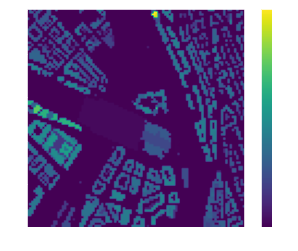

In [26]:
from pygg.inputs.buildings import read_building_heights

heights = read_building_heights(heights_file, SMALL_ZH_GRID_LV95)
plt.imshow(heights)
plt.colorbar()